[*********************100%***********************]  1 of 1 completed

/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

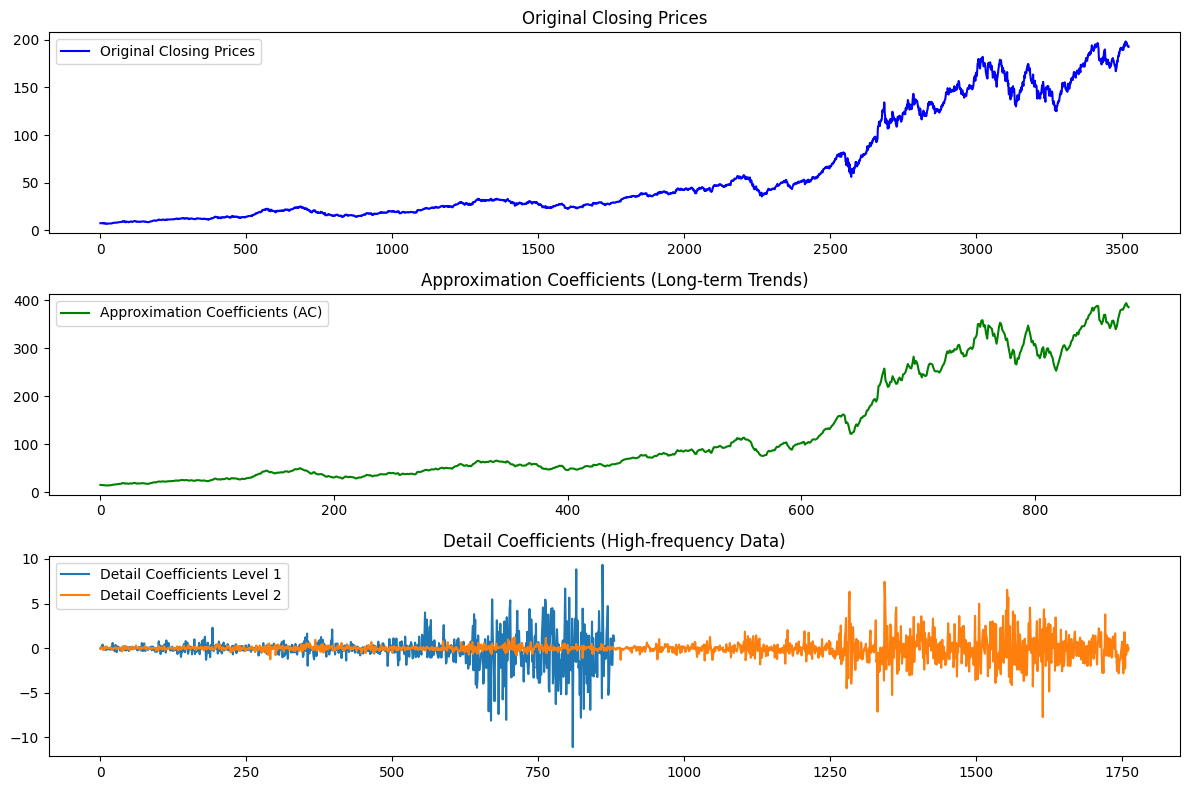

In [1]:
import yfinance as yf
import pywt
import matplotlib.pyplot as plt

# Fetch historical stock data
ticker = "AAPL"  # Example stock: Apple Inc.
start_date = "2010-01-01"
end_date = "2023-12-31"
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Extract the closing price for decomposition
closing_prices = stock_data['Close'].dropna().values

# Apply Haar Wavelet Transform (decompose into 2 levels)
wavelet = 'haar'
coeffs = pywt.wavedec(closing_prices, wavelet, level=2)

# Coefficients
AC = coeffs[0]  # Approximation Coefficients
DC = coeffs[1:]  # Detail Coefficients (list for multiple levels)

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(closing_prices, label="Original Closing Prices", color="blue")
plt.title("Original Closing Prices")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(AC, label="Approximation Coefficients (AC)", color="green")
plt.title("Approximation Coefficients (Long-term Trends)")
plt.legend()

plt.subplot(3, 1, 3)
for i, detail in enumerate(DC, 1):
    plt.plot(detail, label=f"Detail Coefficients Level {i}")
plt.title("Detail Coefficients (High-frequency Data)")
plt.legend()

plt.tight_layout()
plt.show()


In [2]:
import numpy as np

# Combine Approximation Coefficients (AC) and Detail Coefficients (DC)
# Flatten detail coefficients and concatenate
combined_feature_vector = np.concatenate([AC] + [dc for dc in DC])

# Print the shape of the resulting feature vector
print("Combined Feature Vector Shape:", combined_feature_vector.shape)

# Example: Display first 10 elements of the feature vector
print("Combined Feature Vector (first 10 elements):", combined_feature_vector[:10])


Combined Feature Vector Shape: (3524,)
Combined Feature Vector (first 10 elements): [15.18017864 15.00696397 15.01874971 14.65392852 14.37803578 13.96196437
 13.94446397 14.37500048 14.3228569  14.57625055]


In [8]:
!pip install lmfit
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 26.6 MB/s eta 0:00:00a 0:00:01


[*********************100%***********************]  1 of 1 completed

/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


RMSE (Hybrid BPNN+DWT): 1.3791135312802345
MAE (Hybrid BPNN+DWT): 0.6174148430514347
CoV (Hybrid BPNN+DWT): 1.7397938636054584
MAD (Hybrid BPNN+DWT): 11.194390082935506
RMSE (Traditional BPNN): 0.034828573437258405


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


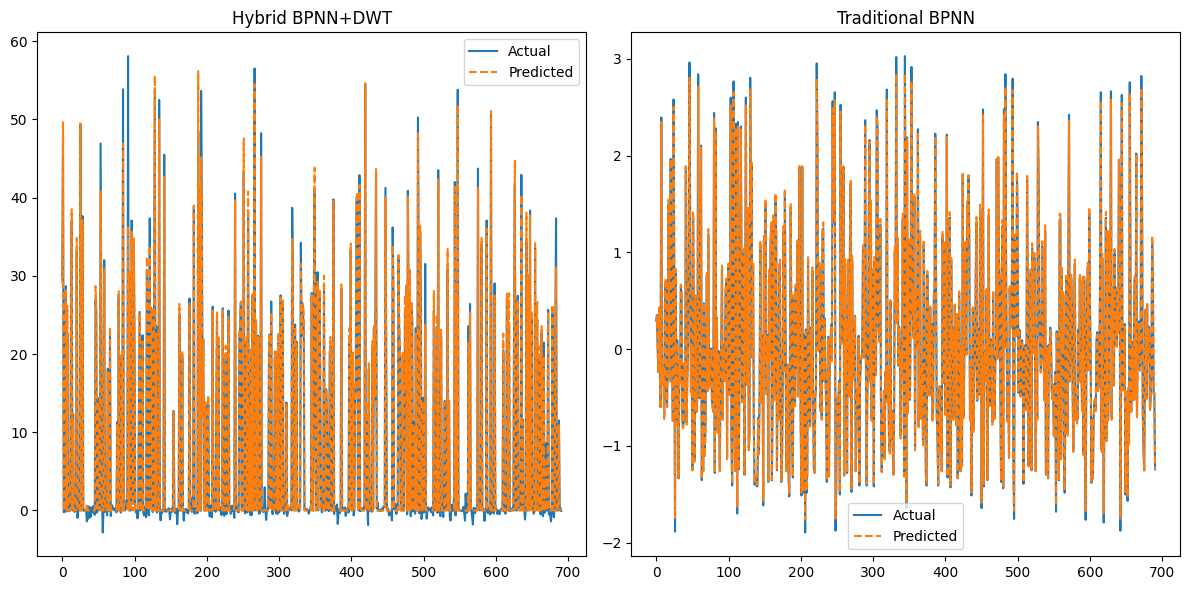

In [59]:
import yfinance as yf
import pywt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Data Collection from Yahoo Finance
def get_stock_data(ticker, start='2010-01-01', end='2024-01-01'):
    data = yf.download(ticker, start=start, end=end)
    return data['Close'].values

# Example: Collect data for a specific stock (e.g., Apple Inc.)
ticker = '3PLAND.NS'
close_prices = get_stock_data(ticker)

# Step 2: Apply Haar Wavelet Transform (DWT)
def haar_wavelet_transform(data, level=2):
    coeffs = pywt.wavedec(data, 'haar', level=level)
    # coeffs[0] - Approximation Coefficients (AC)
    # coeffs[1:] - Detail Coefficients (DC)
    return coeffs

# Decompose the data using Haar wavelet transform
coeffs = haar_wavelet_transform(close_prices)

# Approximation Coefficients (AC)
AC = coeffs[0]

# Detail Coefficients (DC)
DC = np.concatenate(coeffs[1:], axis=0)

# Step 3: Create Feature Vector
feature_vector = np.concatenate((AC, DC), axis=0)

# Step 4: Prepare Data for Training and Testing
# Prepare input (X) and output (y)
X = feature_vector[:-1].reshape(-1, 1)  # Feature vector excluding the last value
y = feature_vector[1:]  # Shifted feature vector for prediction

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Initialize and Train the BPNN Model
bpnn = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, solver='adam', random_state=42)
bpnn.fit(X_train, y_train)

# Step 6: Performance Evaluation for BPNN+DWT
y_pred = bpnn.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate CoV (Coefficient of Variation)
cov = np.std(y_pred) / np.mean(y_pred)

# Calculate MAD (Mean Absolute Deviation)
mad = np.mean(np.abs(y_pred - np.mean(y_pred)))

# Print performance metrics
print(f"RMSE (Hybrid BPNN+DWT): {rmse}")
print(f"MAE (Hybrid BPNN+DWT): {mae}")
print(f"CoV (Hybrid BPNN+DWT): {cov}")
print(f"MAD (Hybrid BPNN+DWT): {mad}")

# Step 7: Compare with Traditional BPNN (without DWT)
# Prepare input for traditional BPNN (no wavelet transform)
X_train_orig, X_test_orig = train_test_split(close_prices, test_size=0.2, random_state=42)
X_train_orig = scaler.fit_transform(X_train_orig.reshape(-1, 1))
X_test_orig = scaler.transform(X_test_orig.reshape(-1, 1))

# Train the traditional BPNN model
bpnn_orig = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, solver='adam', random_state=42)
bpnn_orig.fit(X_train_orig, X_train_orig)

# Predict with traditional BPNN
y_pred_orig = bpnn_orig.predict(X_test_orig)

# Calculate RMSE for traditional model
rmse_orig = np.sqrt(mean_squared_error(X_test_orig, y_pred_orig))

# Print results for traditional BPNN
print(f"RMSE (Traditional BPNN): {rmse_orig}")

# Step 8: Plot Results
# Plot the predicted vs actual values for both models
plt.figure(figsize=(12, 6))

# Plot for Hybrid BPNN+DWT
plt.subplot(1, 2, 1)
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Hybrid BPNN+DWT')
plt.legend()

# Plot for Traditional BPNN
plt.subplot(1, 2, 2)
plt.plot(X_test_orig, label='Actual')
plt.plot(y_pred_orig, label='Predicted', linestyle='--')
plt.title('Traditional BPNN')
plt.legend()

plt.tight_layout()
plt.show()


In [48]:
import yfinance as yf
import numpy as np
import pywt  # for Haar Wavelet Transform
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.neural_network import MLPRegressor  # for Backpropagation Neural Network (BPNN)
from sklearn.model_selection import train_test_split
import pandas as pd

# Function to fetch historical stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close'].values, stock_data.index  # Return 'Close' prices and dates

# Function to perform Haar wavelet decomposition
def haar_wavelet_decomposition(data):
    approximation, details = pywt.dwt(data, 'haar')
    return approximation, details

# Function to create feature vectors from stock data
def create_feature_vector(data, wavelet_decomp=True):
    if wavelet_decomp:
        approximation, details = haar_wavelet_decomposition(data)
        return np.concatenate((approximation, details))  # Combine AC and DC
    else:
        return data  # Return raw data if no wavelet decomposition

# Load historical stock data (for training the model)
ticker = '3PLAND.NS'  # Example: Apple Inc.
start_date = '2020-01-01'
end_date = '2024-01-01'

# Fetch the stock data (closing prices) and corresponding dates
stock_data, stock_dates = get_stock_data(ticker, start_date, end_date)

# Prepare the data for training the model
# Use the previous 10 days of data to predict the next day's closing price
X = []
y = []

# Create feature vectors (using last 10 days of stock data)
window_size = 10
for i in range(window_size, len(stock_data)):
    X.append(stock_data[i-window_size:i])  # Last 10 days as features
    y.append(stock_data[i])  # Next day's closing price as the target

X = np.array(X)
y = np.array(y)

# Normalize the data (optional, but can improve performance)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Backpropagation Neural Network (BPNN)
bpn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, solver='adam', random_state=42)
bpn_model.fit(X_train, y_train)

# Evaluate the model on the test data
test_score = bpn_model.score(X_test, y_test)  # R^2 score
print(f"Model R^2 score on test data: {test_score}")

# Predict the next day's closing price using the latest data
latest_data = stock_data[-window_size:]  # Last 10 days for prediction

# Reshape the latest data for prediction (make sure it's 2D)
latest_data_reshaped = latest_data.reshape(1, -1)  # 1 sample, 10 features
latest_data_scaled = scaler.transform(latest_data_reshaped)  # Scale the latest data

# Predict the next day's closing price
predicted_close = bpn_model.predict(latest_data_scaled)
print(f"Predicted Close for the Next Day: {predicted_close[0]}")

# Get the date of the next day
last_date = stock_dates[-1]  # Last date in the stock data
next_day_date = pd.to_datetime(last_date) + pd.Timedelta(days=1)  # Increment by one day

print(f"Next Day's Date: {next_day_date.strftime('%Y-%m-%d')}")


[*********************100%***********************]  1 of 1 completed

/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


Model R^2 score on test data: 0.9909887145289326
Predicted Close for the Next Day: 26.686243498451542
Next Day's Date: 2023-12-30


In [139]:
import yfinance as yf
import numpy as np
import pywt  # for Haar Wavelet Transform
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.neural_network import MLPRegressor  # for Backpropagation Neural Network (BPNN)
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
import time
from multiprocessing import Pool, cpu_count
import random

# Function to fetch historical stock data with retry logic
def get_stock_data(ticker, start_date, end_date, retries=3, delay=5):
    for attempt in range(retries):
        try:
            stock_data = yf.download(ticker, start=start_date, end=end_date)
            if stock_data.empty:
                raise ValueError(f"No data for {ticker}")
            return stock_data['Open'].values, stock_data.index  # Return 'Close' prices and dates
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
            if attempt < retries - 1:
                print(f"Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                print(f"Failed to fetch data for {ticker} after {retries} attempts.")
                return None, None  # Return None if failed after retries

# Function to perform Haar wavelet decomposition
def haar_wavelet_decomposition(data):
    approximation, details = pywt.dwt(data, 'haar')
    return approximation, details

# Function to create feature vectors from stock data
def create_feature_vector(data, wavelet_decomp=True):
    if wavelet_decomp:
        approximation, details = haar_wavelet_decomposition(data)
        return np.concatenate((approximation, details))  # Combine AC and DC
    else:
        return data  # Return raw data if no wavelet decomposition

# Function to train and evaluate the model for a given stock
def train_and_evaluate_model(ticker, start_date, end_date, window_size=10):
    # Fetch the stock data (closing prices) and corresponding dates
    stock_data, stock_dates = get_stock_data(ticker, start_date, end_date)
    
    if stock_data is None:
        return None  # Return None if no data is available
    
    # Prepare the data for training the model
    X = []
    y = []

    # Create feature vectors (using last 10 days of stock data)
    for i in range(window_size, len(stock_data)):
        X.append(stock_data[i-window_size:i])  # Last 10 days as features
        y.append(stock_data[i])  # Next day's closing price as the target

    X = np.array(X)
    y = np.array(y)

    # Normalize the data (optional, but can improve performance)
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train the Backpropagation Neural Network (BPNN)
    bpn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, solver='adam', random_state=42)
    bpn_model.fit(X_train, y_train)

    # Evaluate the model on the test data (using RMSE as the metric)
    y_pred = bpn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Predict the next day's closing price using the latest data
    latest_data = stock_data[-window_size:]  # Last 10 days for prediction
    latest_data_reshaped = latest_data.reshape(1, -1)  # 1 sample, 10 features
    latest_data_scaled = scaler.transform(latest_data_reshaped)  # Scale the latest data

    predicted_close = bpn_model.predict(latest_data_scaled)

    # Get the date of the next day
    last_date = stock_dates[-1]  # Last date in the stock data
    next_day_date = pd.to_datetime(last_date) + pd.Timedelta(days=1)  # Increment by one day

    return ticker, predicted_close[0], next_day_date.strftime('%Y-%m-%d'), rmse

# Function to process each stock ticker and fetch the result
def process_single_ticker(ticker, start_date, end_date, window_size=10):
    result = train_and_evaluate_model(ticker, start_date, end_date, window_size)
    if result is not None:
        return result
    else:
        return None  # Return None if no result

# Function to process tickers in parallel using multiprocessing
def process_tickers_in_parallel(tickers, start_date, end_date, batch_size=50):
    num_workers = cpu_count()  # Use all available CPU cores
    print(f"Using {num_workers} CPU cores for parallel processing...")

    # Split the tickers into smaller chunks (batches) for parallel processing
    batches = [tickers[i:i + batch_size] for i in range(0, len(tickers), batch_size)]

    best_stock = None
    best_rmse = float('inf')

    # Create a Pool of workers for parallel execution
    with Pool(num_workers) as pool:
        results = pool.starmap(process_single_ticker, [(ticker, start_date, end_date) for ticker in tickers])

        # Filter out None values from the results
        valid_results = [result for result in results if result is not None]

        # Iterate over valid results and track the best stock
        for ticker, predicted_close, next_day_date, rmse in valid_results:
            print(f"Ticker: {ticker}")
            print(f"Predicted Close for Next Day: {predicted_close}")
            print(f"Next Day's Date: {next_day_date}")
            print(f"RMSE: {rmse}")
            print("-" * 50)

            # Track the stock with the best RMSE
            if rmse < best_rmse:
                best_rmse = rmse
                best_stock = ticker

    # Output the best stock based on RMSE
    if best_stock:
        print(f"The best stock based on RMSE is: {best_stock} with RMSE: {best_rmse}")
    else:
        print("No suitable stock found.")

# List of stock tickers to analyze (example with just a few tickers)
stock_tickers = ['PRESTIGE.NS']

# Define the date range
start_date = '2020-01-01'
end_date = '2024-01-03'

# Process the tickers in parallel
process_tickers_in_parallel(stock_tickers, start_date, end_date)


Using 16 CPU cores for parallel processing...


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

[*********************100%***********************]  1 of 1 completed


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ticker: PRESTIGE.NS
Predicted Close for Next Day: 1171.6943594696825
Next Day's Date: 2024-01-03
RMSE: 21.804943494735113
--------------------------------------------------
The best stock based on RMSE is: PRESTIGE.NS with RMSE: 21.804943494735113


In [132]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import pandas as pd

# Function to fetch historical stock data with retry logic
def get_stock_data(ticker, start_date, end_date, retries=3, delay=5):
    for attempt in range(retries):
        try:
            stock_data = yf.download(ticker, start=start_date, end=end_date)
            if stock_data.empty:
                raise ValueError(f"No data for {ticker}")
            return stock_data['Close'].values, stock_data.index  # Return 'Close' prices and dates
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
            if attempt < retries - 1:
                print(f"Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                print(f"Failed to fetch data for {ticker} after {retries} attempts.")
                return None, None  # Return None if failed after retries

# Function to create feature vector from stock data
def create_feature_vector(data, window_size=10):
    X = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])  # Last 'window_size' days as features
    return np.array(X)

# Function to predict the next day's close price using trained model
def predict_next_day_close(ticker, start_date, end_date, window_size=10):
    # Fetch the stock data (closing prices) and corresponding dates
    stock_data, stock_dates = get_stock_data(ticker, start_date, end_date)
    
    if stock_data is None:
        return None  # Return None if no data is available
    
    # Create feature vectors using the last 'window_size' days of data
    X = create_feature_vector(stock_data, window_size)
    
    # Normalize the data (optional, but can improve performance)
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize and train the Backpropagation Neural Network (BPNN)
    bpn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, solver='adam', random_state=42)
    bpn_model.fit(X_scaled, stock_data[window_size:])  # Train the model on the data

    # Predict the next day's closing price using the latest data (last 'window_size' days)
    latest_data = stock_data[-window_size:]  # Last 'window_size' days for prediction
    latest_data_reshaped = latest_data.reshape(1, -1)  # 1 sample, 'window_size' features
    latest_data_scaled = scaler.transform(latest_data_reshaped)  # Scale the latest data

    predicted_close = bpn_model.predict(latest_data_scaled)  # Predict the next day close

    # Get the date of the next day
    last_date = stock_dates[-1]  # Last date in the stock data
    next_day_date = pd.to_datetime(last_date) + pd.Timedelta(days=1)  # Increment by one day

    # Output the prediction and next day's date
    print(f"Predicted Close for {ticker} on {next_day_date.strftime('%Y-%m-%d')}: {predicted_close[0]}")

# Example usage
ticker = 'AKSHOPTFBR.NS'
start_date = '2020-01-01'
end_date = '2024-02-13'
predict_next_day_close(ticker, start_date, end_date)


[*********************100%***********************]  1 of 1 completed

/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


Predicted Close for AKSHOPTFBR.NS on 2024-02-13: 12.204189429959978


In [21]:
import yfinance as yf
from datetime import datetime, timedelta
import time

def get_tickers_with_5_years_data(tickers, batch_size=50, retries=3, retry_delay=5):
    valid_tickers = []
    end_date = datetime.now()
    start_date = end_date - timedelta(days=5*365)  # Approximation of 5 years

    # Split tickers into batches
    batches = [tickers[i:i + batch_size] for i in range(0, len(tickers), batch_size)]

    for batch in batches:
        for ticker in batch:
            attempt = 0
            while attempt < retries:
                try:
                    # Download data for the ticker
                    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
                    
                    # Check if OHLC data is available for the entire 5-year range
                    if not data.empty and data.index[0].date() <= start_date.date():
                        valid_tickers.append(ticker)
                    break  # Break if successful
                except Exception as e:
                    attempt += 1
                    print(f"Error fetching data for {ticker} (Attempt {attempt}/{retries}): {e}")
                    if attempt < retries:
                        print(f"Retrying in {retry_delay} seconds...")
                        time.sleep(retry_delay)  # Wait before retrying
                    else:
                        print(f"Failed to fetch data for {ticker} after {retries} attempts.")
    
    return valid_tickers

# Example Usage
tickers = ['20MICRONS.NS', '21STCENMGM.NS', '3IINFOTECH.NS', '3MINDIA.NS', '3PLAND.NS', '5PAISA.NS', '63MOONS.NS', '8KMILES.NS', 'A2ZINFRA.NS', 'AAKASH.NS', 'AARON.NS', 'AARTIDRUGS.NS', 'AARTIIND.NS', 'AARTISURF.NS', 'AARVEEDEN.NS', 'AARVI.NS', 'AAVAS.NS', 'ABAN.NS', 'ABB.NS', 'ABBOTINDIA.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ABMINTLTD.NS', 'ACC.NS', 'ACCELYA.NS', 'ACCURACY.NS', 'ACE.NS', 'ACRYSIL.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ADANITRANS.NS', 'ADFFOODS.NS', 'ADHUNIKIND.NS', 'ADL.NS', 'ADORWELD.NS', 'ADROITINFO.NS', 'ADSL.NS', 'ADVANIHOTR.NS', 'ADVENZYMES.NS', 'AEGISCHEM.NS', 'AFFLE.NS', 'AGARIND.NS', 'AGCNET.NS', 'AGRITECH.NS', 'AGROPHOS.NS', 'AHLEAST.NS', 'AHLUCONT.NS', 'AHLWEST.NS', 'AIAENG.NS', 'AIRAN.NS', 'AJANTPHARM.NS', 'AJMERA.NS', 'AKASH.NS', 'AKSHARCHEM.NS', 'AKSHOPTFBR.NS', 'AKZOINDIA.NS', 'ALANKIT.NS', 'ALBERTDAVD.NS', 'ALCHEM.NS', 'ALEMBICLTD.NS', 'ALICON.NS', 'ALKALI.NS', 'ALKEM.NS', 'ALKYLAMINE.NS', 'ALLCARGO.NS', 'ALLSEC.NS', 'ALMONDZ.NS', 'ALOKINDS.NS', 'ALPA.NS', 'ALPHAGEO.NS', 'ALPSINDUS.NS', 'AMARAJABAT.NS', 'AMBER.NS', 'AMBIKCO.NS', 'AMBUJACEM.NS', 'AMDIND.NS', 'AMJLAND.NS', 'AMRUTANJAN.NS', 'ANANTRAJ.NS', 'ANDHRACEMT.NS', 'ANDHRAPAP.NS', 'ANDHRSUGAR.NS', 'ANGELBRKG.NS', 'ANIKINDS.NS', 'ANKITMETAL.NS', 'ANSALAPI.NS', 'ANSALHSG.NS', 'ANUP.NS', 'APARINDS.NS', 'APCL.NS', 'APCOTEXIND.NS', 'APEX.NS', 'APLAPOLLO.NS', 'APLLTD.NS', 'APOLLO.NS', 'APOLLOHOSP.NS', 'APOLLOPIPE.NS', 'APOLLOTYRE.NS', 'APOLSINHOT.NS', 'APTECHT.NS', 'ARCHIDPLY.NS', 'ARCHIES.NS', 'ARCOTECH.NS', 'ARENTERP.NS', 'ARIES.NS', 'ARIHANT.NS', 'ARIHANTSUP.NS', 'ARMANFIN.NS', 'AROGRANITE.NS', 'ARROWGREEN.NS', 'ARSHIYA.NS', 'ARSSINFRA.NS', 'ARTEMISMED.NS', 'ARVIND.NS', 'ARVINDFASN.NS', 'ARVSMART.NS', 'ASAHIINDIA.NS', 'ASAHISONG.NS', 'ASAL.NS', 'ASALCBR.NS', 'ASHAPURMIN.NS', 'ASHIANA.NS', 'ASHIMASYN.NS', 'ASHOKA.NS', 'ASHOKLEY.NS', 'ASIANHOTNR.NS', 'ASIANPAINT.NS', 'ASIANTILES.NS', 'ASPINWALL.NS', 'ASTEC.NS', 'ASTERDM.NS', 'ASTRAL.NS', 'ASTRAMICRO.NS', 'ASTRAZEN.NS', 'ASTRON.NS', 'ATFL.NS', 'ATGL.NS', 'ATLANTA.NS', 'ATLASCYCLE.NS', 'ATUL.NS', 'ATULAUTO.NS', 'AUBANK.NS', 'AURIONPRO.NS', 'AUROPHARMA.NS', 'AUSOMENT.NS', 'AUTOAXLES.NS', 'AUTOIND.NS', 'AUTOLITIND.NS', 'AVADHSUGAR.NS', 'AVANTIFEED.NS', 'AVTNPL.NS', 'AWHCL.NS', 'AXISBANK.NS', 'AXISCADES.NS', 'AYMSYNTEX.NS', 'BAFNAPH.NS', 'BAGFILMS.NS', 'BAJAJ-AUTO.NS', 'BAJAJCON.NS', 'BAJAJELEC.NS', 'BAJAJFINSV.NS', 'BAJAJHIND.NS', 'BAJAJHLDNG.NS', 'BAJFINANCE.NS', 'BALAJITELE.NS', 'BALAMINES.NS', 'BALAXI.NS', 'BALKRISHNA.NS', 'BALKRISIND.NS', 'BALLARPUR.NS', 'BALMLAWRIE.NS', 'BALPHARMA.NS', 'BALRAMCHIN.NS', 'BANARBEADS.NS', 'BANARISUG.NS', 'BANCOINDIA.NS', 'BANDHANBNK.NS', 'BANG.NS', 'BANKA.NS', 'BANKBARODA.NS', 'BANKINDIA.NS', 'BANSWRAS.NS', 'BARTRONICS.NS', 'BASF.NS', 'BASML.NS', 'BATAINDIA.NS', 'BAYERCROP.NS', 'BBL.NS', 'BBTC.NS', 'BCG.NS', 'BCP.NS', 'BDL.NS', 'BEARDSELL.NS', 'BECTORFOOD.NS', 'BEDMUTHA.NS', 'BEL.NS', 'BEML.NS', 'BEPL.NS', 'BERGEPAINT.NS', 'BFINVEST.NS', 'BFUTILITIE.NS', 'BGRENERGY.NS', 'BHAGERIA.NS', 'BHAGYANGR.NS', 'BHAGYAPROP.NS', 'BHANDARI.NS', 'BHARATFORG.NS', 'BHARATGEAR.NS', 'BHARATRAS.NS', 'BHARATWIRE.NS', 'BHARTIARTL.NS', 'BHEL.NS', 'BIGBLOC.NS', 'BIL.NS', 'BILENERGY.NS', 'BINDALAGRO.NS', 'BIOCON.NS', 'BIOFILCHEM.NS', 'BIRLACABLE.NS', 'BIRLACORPN.NS', 'BIRLAMONEY.NS', 'BIRLATYRE.NS', 'BKMINDST.NS', 'BLBLIMITED.NS', 'BLISSGVS.NS', 'BLKASHYAP.NS', 'BLS.NS', 'BLUECOAST.NS', 'BLUEDART.NS', 'BLUESTARCO.NS', 'BODALCHEM.NS', 'BOMDYEING.NS', 'BOROLTD.NS', 'BORORENEW.NS', 'BOSCHLTD.NS', 'BPCL.NS', 'BPL.NS', 'BRFL.NS', 'BRIGADE.NS', 'BRITANNIA.NS', 'BRNL.NS', 'BROOKS.NS', 'BSE.NS', 'BSELINFRA.NS', 'BSHSL.NS', 'BSL.NS', 'BSOFT.NS', 'BURGERKING.NS', 'BURNPUR.NS', 'BUTTERFLY.NS', 'BVCL.NS', 'BYKE.NS', 'CADILAHC.NS', 'CALSOFT.NS', 'CAMLINFINE.NS', 'CAMS.NS', 'CANBK.NS', 'CANDC.NS', 'CANFINHOME.NS', 'CANTABIL.NS', 'CAPACITE.NS', 'CAPLIPOINT.NS', 'CAPTRUST.NS', 'CARBORUNIV.NS', 'CAREERP.NS', 'CARERATING.NS', 'CASTROLIND.NS', 'CCHHL.NS', 'CCL.NS', 'CDSL.NS', 'CEATLTD.NS', 'CEBBCO.NS', 'CELEBRITY.NS', 'CENTENKA.NS', 'CENTEXT.NS', 'CENTRALBK.NS', 'CENTRUM.NS', 'CENTUM.NS', 'CENTURYPLY.NS', 'CENTURYTEX.NS', 'CERA.NS', 'CEREBRAINT.NS', 'CESC.NS', 'CESCVENT.NS', 'CGCL.NS', 'CGPOWER.NS', 'CHALET.NS', 'CHAMBLFERT.NS', 'CHEMBOND.NS', 'CHEMCON.NS', 'CHEMFAB.NS', 'CHENNPETRO.NS', 'CHOLAFIN.NS', 'CHOLAHLDNG.NS', 'CHROMATIC.NS', 'CIGNITITEC.NS', 'CINELINE.NS', 'CINEVISTA.NS', 'CIPLA.NS', 'CLEDUCATE.NS', 'CLNINDIA.NS', 'CMICABLES.NS', 'CNOVAPETRO.NS', 'COALINDIA.NS', 'COCHINSHIP.NS', 'COFORGE.NS', 'COLPAL.NS', 'COMPINFO.NS', 'COMPUSOFT.NS', 'CONCOR.NS', 'CONFIPET.NS', 'CONSOFINVT.NS', 'CONTROLPR.NS', 'CORALFINAC.NS', 'CORDSCABLE.NS', 'COROMANDEL.NS', 'COSMOFILMS.NS', 'COUNCODOS.NS', 'COX&KINGS.NS', 'CREATIVE.NS', 'CREATIVEYE.NS', 'CREDITACC.NS', 'CREST.NS', 'CRISIL.NS', 'CROMPTON.NS', 'CSBBANK.NS', 'CTE.NS', 'CUB.NS', 'CUBEXTUB.NS', 'CUMMINSIND.NS', 'CUPID.NS', 'CYBERMEDIA.NS', 'CYBERTECH.NS', 'CYIENT.NS', 'DAAWAT.NS', 'DABUR.NS', 'DALBHARAT.NS', 'DALMIASUG.NS', 'DAMODARIND.NS', 'DANGEE.NS', 'DATAMATICS.NS', 'DBCORP.NS', 'DBL.NS', 'DBREALTY.NS', 'DBSTOCKBRO.NS', 'DCAL.NS', 'DCBBANK.NS', 'DCM.NS', 'DCMFINSERV.NS', 'DCMNVL.NS', 'DCMSHRIRAM.NS', 'DCW.NS', 'DECCANCE.NS', 'DEEPAKFERT.NS', 'DEEPAKNTR.NS', 'DEEPENR.NS', 'DELTACORP.NS', 'DELTAMAGNT.NS', 'DEN.NS', 'DENORA.NS', 'DFMFOODS.NS', 'DGCONTENT.NS', 'DHAMPURSUG.NS', 'DHANBANK.NS', 'DHANI.NS', 'DHANUKA.NS', 'DHARSUGAR.NS', 'DHFL.NS', 'DHUNINV.NS', 'DIAMONDYD.NS', 'DIAPOWER.NS', 'DICIND.NS', 'DIGISPICE.NS', 'DIGJAMLTD.NS', 'DISHTV.NS', 'DIVISLAB.NS', 'DIXON.NS', 'DLF.NS', 'DLINKINDIA.NS', 'DMART.NS', 'DNAMEDIA.NS', 'DOLAT.NS', 'DOLLAR.NS', 'DONEAR.NS', 'DPABHUSHAN.NS', 'DPSCLTD.NS', 'DPWIRES.NS', 'DQE.NS', 'DREDGECORP.NS', 'DRREDDY.NS', 'DSSL.NS', 'DTIL.NS', 'DUCON.NS', 'DVL.NS', 'DWARKESH.NS', 'DYNAMATECH.NS', 'DYNPRO.NS', 'EASTSILK.NS', 'EASUNREYRL.NS', 'EBIXFOREX.NS', 'ECLERX.NS', 'EDELWEISS.NS', 'EDUCOMP.NS', 'EICHERMOT.NS', 'EIDPARRY.NS', 'EIHAHOTELS.NS', 'EIHOTEL.NS', 'EIMCOELECO.NS', 'EKC.NS', 'ELECON.NS', 'ELECTCAST.NS', 'ELECTHERM.NS', 'ELGIEQUIP.NS', 'ELGIRUBCO.NS', 'EMAMILTD.NS', 'EMAMIPAP.NS', 'EMAMIREAL.NS', 'EMCO.NS', 'EMKAY.NS', 'EMMBI.NS', 'ENDURANCE.NS', 'ENERGYDEV.NS', 'ENGINERSIN.NS', 'ENIL.NS', 'EPL.NS', 'EQUITAS.NS', 'EQUITASBNK.NS', 'ERIS.NS', 'EROSMEDIA.NS', 'ESABINDIA.NS', 'ESCORTS.NS', 'ESSARSHPNG.NS', 'ESTER.NS', 'EUROMULTI.NS', 'EUROTEXIND.NS', 'EVEREADY.NS', 'EVERESTIND.NS', 'EXCEL.NS', 'EXCELINDUS.NS', 'EXIDEIND.NS', 'EXPLEOSOL.NS', 'FACT.NS', 'FAIRCHEMOR.NS', 'FCL.NS', 'FCONSUMER.NS', 'FCSSOFT.NS', 'FDC.NS', 'FEDERALBNK.NS', 'FEL.NS', 'FELDVR.NS', 'FIEMIND.NS', 'FILATEX.NS', 'FINCABLES.NS', 'FINEORG.NS', 'FINPIPE.NS', 'FLEXITUFF.NS', 'FLFL.NS', 'FLUOROCHEM.NS', 'FMGOETZE.NS', 'FMNL.NS', 'FORCEMOT.NS', 'FORTIS.NS', 'FOSECOIND.NS', 'FRETAIL.NS', 'FSC.NS', 'FSL.NS', 'GABRIEL.NS', 'GAEL.NS', 'GAIL.NS', 'GAL.NS', 'GALAXYSURF.NS', 'GALLANTT.NS', 'GALLISPAT.NS', 'GAMMNINFRA.NS', 'GANDHITUBE.NS', 'GANECOS.NS', 'GANESHHOUC.NS', 'GANGESSECU.NS', 'GARDENSILK.NS', 'GARFIBRES.NS', 'GATI.NS', 'GAYAHWS.NS', 'GAYAPROJ.NS', 'GBGLOBAL.NS', 'GDL.NS', 'GEECEE.NS', 'GEEKAYWIRE.NS', 'GENESYS.NS', 'GENUSPAPER.NS', 'GENUSPOWER.NS', 'GEOJITFSL.NS', 'GEPIL.NS', 'GESHIP.NS', 'GET&D.NS', 'GFLLIMITED.NS', 'GFSTEELS.NS', 'GHCL.NS', 'GICHSGFIN.NS', 'GICRE.NS', 'GILLANDERS.NS', 'GILLETTE.NS', 'GINNIFILA.NS', 'GIPCL.NS', 'GISOLUTION.NS', 'GKWLIMITED.NS', 'GLAND.NS', 'GLAXO.NS', 'GLENMARK.NS', 'GLFL.NS', 'GLOBAL.NS', 'GLOBALVECT.NS', 'GLOBE.NS', 'GLOBOFFS.NS', 'GLOBUSSPR.NS', 'GMBREW.NS', 'GMDCLTD.NS', 'GMMPFAUDLR.NS', 'GMRINFRA.NS', 'GNA.NS', 'GNFC.NS', 'GOACARBON.NS', 'GOCLCORP.NS', 'GODFRYPHLP.NS', 'GODHA.NS', 'GODREJAGRO.NS', 'GODREJCP.NS', 'GODREJIND.NS', 'GODREJPROP.NS', 'GOENKA.NS', 'GOKEX.NS', 'GOKUL.NS', 'GOKULAGRO.NS', 'GOLDENTOBC.NS', 'GOLDIAM.NS', 'GOLDTECH.NS', 'GOODLUCK.NS', 'GOODYEAR.NS', 'GPIL.NS', 'GPPL.NS', 'GPTINFRA.NS', 'GRANULES.NS', 'GRAPHITE.NS', 'GRASIM.NS', 'GRAVITA.NS', 'GREAVESCOT.NS', 'GREENLAM.NS', 'GREENPANEL.NS', 'GREENPLY.NS', 'GREENPOWER.NS', 'GRINDWELL.NS', 'GROBTEA.NS', 'GRPLTD.NS', 'GRSE.NS', 'GSCLCEMENT.NS', 'GSFC.NS', 'GSPL.NS', 'GSS.NS', 'GTL.NS', 'GTLINFRA.NS', 'GTNIND.NS', 'GTNTEX.NS', 'GTPL.NS', 'GUFICBIO.NS', 'GUJALKALI.NS', 'GUJAPOLLO.NS', 'GUJGASLTD.NS', 'GUJRAFFIA.NS', 'GULFOILLUB.NS', 'GULFPETRO.NS', 'GULPOLY.NS', 'GVKPIL.NS', 'HAL.NS', 'HAPPSTMNDS.NS', 'HARITASEAT.NS', 'HARRMALAYA.NS', 'HATHWAY.NS', 'HATSUN.NS', 'HAVELLS.NS', 'HAVISHA.NS', 'HBLPOWER.NS', 'HBSL.NS', 'HCC.NS', 'HCG.NS', 'HCL-INSYS.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCAMC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HDIL.NS', 'HEG.NS', 'HEIDELBERG.NS', 'HEMIPROP.NS', 'HERCULES.NS', 'HERITGFOOD.NS', 'HEROMOTOCO.NS', 'HESTERBIO.NS', 'HEXATRADEX.NS', 'HFCL.NS', 'HGINFRA.NS', 'HGS.NS', 'HIKAL.NS', 'HIL.NS', 'HILTON.NS', 'HIMATSEIDE.NS', 'HINDALCO.NS', 'HINDCOMPOS.NS', 'HINDCOPPER.NS', 'HINDMOTORS.NS', 'HINDNATGLS.NS', 'HINDOILEXP.NS', 'HINDPETRO.NS', 'HINDUNILVR.NS', 'HINDZINC.NS', 'HIRECT.NS', 'HISARMETAL.NS', 'HITECH.NS', 'HITECHCORP.NS', 'HITECHGEAR.NS', 'HLVLTD.NS', 'HMT.NS', 'HMVL.NS', 'HNDFDS.NS', 'HONAUT.NS', 'HONDAPOWER.NS', 'HOTELRUGBY.NS', 'HOVS.NS', 'HPL.NS', 'HSCL.NS', 'HSIL.NS', 'HTMEDIA.NS', 'HUBTOWN.NS', 'HUDCO.NS', 'HUHTAMAKI.NS', 'IBREALEST.NS', 'IBULHSGFIN.NS', 'ICEMAKE.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 'ICIL.NS', 'ICRA.NS', 'IDBI.NS', 'IDEA.NS', 'IDFC.NS', 'IDFCFIRSTB.NS', 'IEX.NS', 'IFBAGRO.NS', 'IFBIND.NS', 'IFCI.NS', 'IFGLEXPOR.NS', 'IGARASHI.NS', 'IGL.NS', 'IGPL.NS', 'IIFL.NS', 'IIFLSEC.NS', 'IIFLWAM.NS', 'IITL.NS', 'IL&FSENGG.NS', 'IL&FSTRANS.NS', 'IMAGICAA.NS', 'IMFA.NS', 'IMPAL.NS', 'INDBANK.NS', 'INDHOTEL.NS', 'INDIACEM.NS', 'INDIAGLYCO.NS', 'INDIAMART.NS', 'INDIANB.NS', 'INDIANCARD.NS', 'INDIANHUME.NS', 'INDIGO.NS', 'INDLMETER.NS', 'INDNIPPON.NS', 'INDOCO.NS', 'INDORAMA.NS', 'INDOSOLAR.NS', 'INDOSTAR.NS', 'INDOTECH.NS', 'INDOTHAI.NS', 'INDOWIND.NS', 'INDRAMEDCO.NS', 'INDSWFTLAB.NS', 'INDSWFTLTD.NS', 'INDTERRAIN.NS', 'INDUSINDBK.NS', 'INDUSTOWER.NS', 'INEOSSTYRO.NS', 'INFIBEAM.NS', 'INFOBEAN.NS', 'INFOMEDIA.NS', 'INFY.NS', 'INGERRAND.NS', 'INOXLEISUR.NS', 'INOXWIND.NS', 'INSECTICID.NS', 'INSPIRISYS.NS', 'INTEGRA.NS', 'INTELLECT.NS', 'INTENTECH.NS', 'INVENTURE.NS', 'IOB.NS', 'IOC.NS', 'IOLCP.NS', 'IPCALAB.NS', 'IRB.NS', 'IRCON.NS', 'IRCTC.NS', 'ISEC.NS', 'ISFT.NS', 'ISMTLTD.NS', 'ITC.NS', 'ITDC.NS', 'ITDCEM.NS', 'ITI.NS', 'IVC.NS', 'IVP.NS', 'IZMO.NS', 'J&KBANK.NS', 'JAGRAN.NS', 'JAGSNPHARM.NS', 'JAIBALAJI.NS', 'JAICORPLTD.NS', 'JAIHINDPRO.NS', 'JAINSTUDIO.NS', 'JAMNAAUTO.NS', 'JASH.NS', 'JAYAGROGN.NS', 'JAYBARMARU.NS', 'JAYNECOIND.NS', 'JAYSREETEA.NS', 'JBCHEPHARM.NS', 'JBFIND.NS', 'JBMA.NS', 'JCHAC.NS', 'JETAIRWAYS.NS', 'JHS.NS', 'JINDALPHOT.NS', 'JINDALPOLY.NS', 'JINDALSAW.NS', 'JINDALSTEL.NS', 'JINDRILL.NS', 'JINDWORLD.NS', 'JISLDVREQS.NS', 'JISLJALEQS.NS', 'JITFINFRA.NS', 'JIYAECO.NS', 'JKCEMENT.NS', 'JKIL.NS', 'JKLAKSHMI.NS', 'JKPAPER.NS', 'JKTYRE.NS', 'JMA.NS', 'JMCPROJECT.NS', 'JMFINANCIL.NS', 'JMTAUTOLTD.NS', 'JOCIL.NS', 'JPASSOCIAT.NS', 'JPINFRATEC.NS', 'JPOLYINVST.NS', 'JPPOWER.NS', 'JSL.NS', 'JSLHISAR.NS', 'JSWENERGY.NS', 'JSWHL.NS', 'JSWISPL.NS', 'JSWSTEEL.NS', 'JTEKTINDIA.NS', 'JUBILANT.NS', 'JUBLFOOD.NS', 'JUBLINDS.NS', 'JUMPNET.NS', 'JUSTDIAL.NS', 'JYOTHYLAB.NS', 'JYOTISTRUC.NS', 'KABRAEXTRU.NS', 'KAJARIACER.NS', 'KAKATCEM.NS', 'KALPATPOWR.NS', 'KALYANI.NS', 'KALYANIFRG.NS', 'KAMATHOTEL.NS', 'KAMDHENU.NS', 'KANANIIND.NS', 'KANORICHEM.NS', 'KANPRPLA.NS', 'KANSAINER.NS', 'KAPSTON.NS', 'KARDA.NS', 'KARMAENG.NS', 'KARURVYSYA.NS', 'KAUSHALYA.NS', 'KAYA.NS', 'KCP.NS', 'KCPSUGIND.NS', 'KDDL.NS', 'KEC.NS', 'KECL.NS', 'KEERTI.NS', 'KEI.NS', 'KELLTONTEC.NS', 'KENNAMET.NS', 'KERNEX.NS', 'KESORAMIND.NS', 'KEYFINSERV.NS', 'KGL.NS', 'KHADIM.NS', 'KHAICHEM.NS', 'KHANDSE.NS', 'KICL.NS', 'KILITCH.NS', 'KINGFA.NS', 'KIOCL.NS', 'KIRIINDUS.NS', 'KIRLFER.NS', 'KIRLOSBROS.NS', 'KIRLOSENG.NS', 'KIRLOSIND.NS', 'KITEX.NS', 'KKCL.NS', 'KMSUGAR.NS', 'KNRCON.NS', 'KOKUYOCMLN.NS', 'KOLTEPATIL.NS', 'KOPRAN.NS', 'KOTAKBANK.NS', 'KOTARISUG.NS', 'KOTHARIPET.NS', 'KOTHARIPRO.NS', 'KPITTECH.NS', 'KPRMILL.NS', 'KRBL.NS', 'KREBSBIO.NS', 'KRIDHANINF.NS', 'KRISHANA.NS', 'KSB.NS', 'KSCL.NS', 'KSK.NS', 'KSL.NS', 'KTKBANK.NS', 'KUANTUM.NS', 'KWALITY.NS', 'L&TFH.NS', 'LAKPRE.NS', 'LALPATHLAB.NS', 'LAMBODHARA.NS', 'LAOPALA.NS', 'LASA.NS', 'LAURUSLABS.NS', 'LAXMIMACH.NS', 'LEMONTREE.NS', 'LFIC.NS', 'LGBBROSLTD.NS', 'LGBFORGE.NS', 'LIBAS.NS', 'LIBERTSHOE.NS', 'LICHSGFIN.NS', 'LIKHITHA.NS', 'LINCOLN.NS', 'LINCPEN.NS', 'LINDEINDIA.NS', 'LOKESHMACH.NS', 'LOTUSEYE.NS', 'LOVABLE.NS', 'LPDC.NS', 'LSIL.NS', 'LT.NS', 'LTI.NS', 'LTTS.NS', 'LUMAXIND.NS', 'LUMAXTECH.NS', 'LUPIN.NS', 'LUXIND.NS', 'LYKALABS.NS', 'LYPSAGEMS.NS', 'M&M.NS', 'M&MFIN.NS', 'MAANALU.NS', 'MACPOWER.NS', 'MADHAV.NS', 'MADHUCON.NS', 'MADRASFERT.NS', 'MAGADSUGAR.NS', 'MAGMA.NS', 'MAGNUM.NS', 'MAHABANK.NS', 'MAHAPEXLTD.NS', 'MAHASTEEL.NS', 'MAHEPC.NS', 'MAHESHWARI.NS', 'MAHINDCIE.NS', 'MAHLIFE.NS', 'MAHLOG.NS', 'MAHSCOOTER.NS', 'MAHSEAMLES.NS', 'MAITHANALL.NS', 'MAJESCO.NS', 'MALUPAPER.NS', 'MANAKALUCO.NS', 'MANAKCOAT.NS', 'MANAKSIA.NS', 'MANAKSTEEL.NS', 'MANALIPETC.NS', 'MANAPPURAM.NS', 'MANGALAM.NS', 'MANGCHEFER.NS', 'MANGLMCEM.NS', 'MANGTIMBER.NS', 'MANINDS.NS', 'MANINFRA.NS', 'MANUGRAPH.NS', 'MARALOVER.NS', 'MARATHON.NS', 'MARICO.NS', 'MARINE.NS', 'MARKSANS.NS', 'MARUTI.NS', 'MASFIN.NS', 'MASKINVEST.NS', 'MASTEK.NS', 'MATRIMONY.NS', 'MAWANASUG.NS', 'MAXHEALTH.NS', 'MAXIND.NS', 'MAXVIL.NS', 'MAYURUNIQ.NS', 'MAZDA.NS', 'MAZDOCK.NS', 'MBAPL.NS', 'MBECL.NS', 'MBLINFRA.NS', 'MCDHOLDING.NS', 'MCDOWELL-N.NS', 'MCL.NS', 'MCLEODRUSS.NS', 'MCX.NS', 'MEGASOFT.NS', 'MEGH.NS', 'MELSTAR.NS', 'MENONBE.NS', 'MEP.NS', 'MERCATOR.NS', 'METALFORGE.NS', 'METKORE.NS', 'METROPOLIS.NS', 'MFSL.NS', 'MGEL.NS', 'MGL.NS', 'MHRIL.NS', 'MIC.NS', 'MIDHANI.NS', 'MINDACORP.NS', 'MINDAIND.NS', 'MINDTECK.NS', 'MINDTREE.NS', 'MIRCELECTR.NS', 'MIRZAINT.NS', 'MITTAL.NS', 'MMFL.NS', 'MMP.NS', 'MMTC.NS', 'MODIRUBBER.NS', 'MOHITIND.NS', 'MOHOTAIND.NS', 'MOIL.NS', 'MOLDTECH.NS', 'MOLDTKPAC.NS', 'MONTECARLO.NS', 'MORARJEE.NS', 'MOREPENLAB.NS', 'MOTHERSUMI.NS', 'MOTILALOFS.NS', 'MOTOGENFIN.NS', 'MPHASIS.NS', 'MPSLTD.NS', 'MRF.NS', 'MRO-TEK.NS', 'MRPL.NS', 'MSPL.NS', 'MSTCLTD.NS', 'MTEDUCARE.NS', 'MTNL.NS', 'MUKANDENGG.NS', 'MUKANDLTD.NS', 'MUKTAARTS.NS', 'MUNJALAU.NS', 'MUNJALSHOW.NS', 'MURUDCERA.NS', 'MUTHOOTCAP.NS', 'MUTHOOTFIN.NS', 'NACLIND.NS', 'NAGAFERT.NS', 'NAGREEKCAP.NS', 'NAGREEKEXP.NS', 'NAHARCAP.NS', 'NAHARINDUS.NS', 'NAHARPOLY.NS', 'NAHARSPING.NS', 'NAM-INDIA.NS', 'NATCOPHARM.NS', 'NATHBIOGEN.NS', 'NATIONALUM.NS', 'NATNLSTEEL.NS', 'NAUKRI.NS', 'NAVINFLUOR.NS', 'NAVKARCORP.NS', 'NAVNETEDUL.NS', 'NBCC.NS', 'NBIFIN.NS', 'NBVENTURES.NS', 'NCC.NS', 'NCLIND.NS', 'NDGL.NS', 'NDL.NS', 'NDRAUTO.NS', 'NDTV.NS', 'NECCLTD.NS', 'NECLIFE.NS', 'NELCAST.NS', 'NELCO.NS', 'NEOGEN.NS', 'NESCO.NS', 'NESTLEIND.NS', 'NETWORK18.NS', 'NEULANDLAB.NS', 'NEWGEN.NS', 'NEXTMEDIA.NS', 'NFL.NS', 'NH.NS', 'NHPC.NS', 'NIACL.NS', 'NIITLTD.NS', 'NILAINFRA.NS', 'NILASPACES.NS', 'NILKAMAL.NS', 'NIPPOBATRY.NS', 'NIRAJ.NS', 'NIRAJISPAT.NS', 'NITCO.NS', 'NITINFIRE.NS', 'NITINSPIN.NS', 'NKIND.NS', 'NLCINDIA.NS', 'NMDC.NS', 'NOCIL.NS', 'NOIDATOLL.NS', 'NORBTEAEXP.NS', 'NOVARTIND.NS', 'NRAIL.NS', 'NRBBEARING.NS', 'NSIL.NS', 'NTL.NS', 'NTPC.NS', 'NUCLEUS.NS', 'NXTDIGITAL.NS', 'OAL.NS', 'OBEROIRLTY.NS', 'OCCL.NS', 'OFSS.NS', 'OIL.NS', 'OISL.NS', 'OLECTRA.NS', 'OMAXAUTO.NS', 'OMAXE.NS', 'OMMETALS.NS', 'ONELIFECAP.NS', 'ONEPOINT.NS', 'ONGC.NS', 'ONMOBILE.NS', 'ONWARDTEC.NS', 'OPTIEMUS.NS', 'OPTOCIRCUI.NS', 'ORBTEXP.NS', 'ORCHPHARMA.NS', 'ORICONENT.NS', 'ORIENTABRA.NS', 'ORIENTALTL.NS', 'ORIENTBELL.NS', 'ORIENTCEM.NS', 'ORIENTELEC.NS', 'ORIENTHOT.NS', 'ORIENTLTD.NS', 'ORIENTPPR.NS', 'ORIENTREF.NS', 'ORISSAMINE.NS', 'ORTEL.NS', 'OSWALAGRO.NS', 'PAEL.NS', 'PAGEIND.NS', 'PAISALO.NS', 'PALASHSECU.NS', 'PALREDTEC.NS', 'PANACEABIO.NS', 'PANACHE.NS', 'PANAMAPET.NS', 'PARABDRUGS.NS', 'PARACABLES.NS', 'PARAGMILK.NS', 'PARSVNATH.NS', 'PATELENG.NS', 'PATINTLOG.NS', 'PATSPINLTD.NS', 'PCJEWELLER.NS', 'PDMJEPAPER.NS', 'PDSMFL.NS', 'PEARLPOLY.NS', 'PEL.NS', 'PENIND.NS', 'PENINLAND.NS', 'PERSISTENT.NS', 'PETRONET.NS', 'PFC.NS', 'PFIZER.NS', 'PFOCUS.NS', 'PFS.NS', 'PGEL.NS', 'PGHH.NS', 'PGHL.NS', 'PGIL.NS', 'PHILIPCARB.NS', 'PHOENIXLTD.NS', 'PIDILITIND.NS', 'PIIND.NS', 'PILANIINVS.NS', 'PILITA.NS', 'PIONDIST.NS', 'PIONEEREMB.NS', 'PITTIENG.NS', 'PKTEA.NS', 'PLASTIBLEN.NS', 'PNB.NS', 'PNBGILTS.NS', 'PNBHOUSING.NS', 'PNC.NS', 'PNCINFRA.NS', 'PODDARHOUS.NS', 'PODDARMENT.NS', 'POKARNA.NS', 'POLYCAB.NS', 'POLYMED.NS', 'POLYPLEX.NS', 'PONNIERODE.NS', 'POWERGRID.NS', 'POWERINDIA.NS', 'POWERMECH.NS', 'PPAP.NS', 'PPL.NS', 'PRABHAT.NS', 'PRAENG.NS', 'PRAJIND.NS', 'PRAKASH.NS', 'PRAKASHSTL.NS', 'PRAXIS.NS', 'PRECAM.NS', 'PRECOT.NS', 'PRECWIRE.NS', 'PREMEXPLN.NS', 'PREMIER.NS', 'PREMIERPOL.NS', 'PRESSMN.NS', 'PRESTIGE.NS', 'PRICOLLTD.NS', 'PRIMESECU.NS', 'PRINCEPIPE.NS', 'PRIVISCL.NS', 'PROZONINTU.NS', 'PRSMJOHNSN.NS', 'PSB.NS', 'PSPPROJECT.NS', 'PTC.NS', 'PTL.NS', 'PUNJABCHEM.NS', 'PUNJLLOYD.NS', 'PURVA.NS', 'PVR.NS', 'QUESS.NS', 'QUICKHEAL.NS', 'RADAAN.NS', 'RADICO.NS', 'RADIOCITY.NS', 'RAIN.NS', 'RAJESHEXPO.NS', 'RAJRATAN.NS', 'RAJRAYON.NS', 'RAJSREESUG.NS', 'RAJTV.NS', 'RALLIS.NS', 'RAMANEWS.NS', 'RAMASTEEL.NS', 'RAMCOCEM.NS', 'RAMCOIND.NS', 'RAMCOSYS.NS', 'RAMKY.NS', 'RAMSARUP.NS', 'RANASUG.NS', 'RANEENGINE.NS', 'RANEHOLDIN.NS', 'RATNAMANI.NS', 'RAYMOND.NS', 'RBL.NS', 'RBLBANK.NS', 'RCF.NS', 'RCOM.NS', 'RECLTD.NS', 'REDINGTON.NS', 'REFEX.NS', 'RELAXO.NS', 'RELCAPITAL.NS', 'RELIANCE.NS', 'RELIGARE.NS', 'RELINFRA.NS', 'REMSONSIND.NS', 'RENUKA.NS', 'REPCOHOME.NS', 'REPL.NS', 'REPRO.NS', 'RESPONIND.NS', 'REVATHI.NS', 'RGL.NS', 'RHFL.NS', 'RICOAUTO.NS', 'RIIL.NS', 'RITES.NS', 'RKDL.NS', 'RKEC.NS', 'RKFORGE.NS', 'RMCL.NS', 'RML.NS', 'RNAVAL.NS', 'ROHITFERRO.NS', 'ROHLTD.NS', 'ROLLT.NS', 'ROLTA.NS', 'ROML.NS', 'ROSSARI.NS', 'ROSSELLIND.NS', 'ROUTE.NS', 'RPGLIFE.NS', 'RPOWER.NS', 'RPPINFRA.NS', 'RSSOFTWARE.NS', 'RSWM.NS', 'RSYSTEMS.NS', 'RTNINFRA.NS', 'RTNPOWER.NS', 'RUBYMILLS.NS', 'RUCHI.NS', 'RUCHINFRA.NS', 'RUCHIRA.NS', 'RUPA.NS', 'RUSHIL.NS', 'RVHL.NS', 'RVNL.NS', 'S&SPOWER.NS', 'SABEVENTS.NS', 'SADBHAV.NS', 'SADBHIN.NS', 'SAFARI.NS', 'SAGARDEEP.NS', 'SAGCEM.NS', 'SAIL.NS', 'SAKAR.NS', 'SAKHTISUG.NS', 'SAKSOFT.NS', 'SAKUMA.NS', 'SALASAR.NS', 'SALONA.NS', 'SALSTEEL.NS', 'SALZERELEC.NS', 'SAMBHAAV.NS', 'SANCO.NS', 'SANDESH.NS', 'SANDHAR.NS', 'SANGAMIND.NS', 'SANGHIIND.NS', 'SANGHVIFOR.NS', 'SANGHVIMOV.NS', 'SANGINITA.NS', 'SANOFI.NS', 'SANWARIA.NS', 'SARDAEN.NS', 'SAREGAMA.NS', 'SARLAPOLY.NS', 'SASKEN.NS', 'SASTASUNDR.NS', 'SATIA.NS', 'SATIN.NS', 'SBICARD.NS', 'SBILIFE.NS', 'SBIN.NS', 'SCAPDVR.NS', 'SCHAEFFLER.NS', 'SCHAND.NS', 'SCHNEIDER.NS', 'SCI.NS', 'SDBL.NS', 'SEAMECLTD.NS', 'SELAN.NS', 'SELMCL.NS', 'SEPOWER.NS', 'SEQUENT.NS', 'SESHAPAPER.NS', 'SETCO.NS', 'SETUINFRA.NS', 'SEYAIND.NS', 'SEZAL.NS', 'SFL.NS', 'SGL.NS', 'SHAHALLOYS.NS', 'SHAKTIPUMP.NS', 'SHALBY.NS', 'SHALPAINTS.NS', 'SHANKARA.NS', 'SHANTIGEAR.NS', 'SHARDACROP.NS', 'SHARDAMOTR.NS', 'SHAREINDIA.NS', 'SHEMAROO.NS', 'SHIL.NS', 'SHILPAMED.NS', 'SHIRPUR-G.NS', 'SHIVAMAUTO.NS', 'SHIVAMILLS.NS', 'SHIVATEX.NS', 'SHK.NS', 'SHOPERSTOP.NS', 'SHRADHA.NS', 'SHREDIGCEM.NS', 'SHREECEM.NS', 'SHREEPUSHK.NS', 'SHREERAMA.NS', 'SHRENIK.NS', 'SHREYANIND.NS', 'SHREYAS.NS', 'SHRIPISTON.NS', 'SHRIRAMCIT.NS', 'SHRIRAMEPC.NS', 'SHYAMCENT.NS', 'SHYAMTEL.NS', 'SICAGEN.NS', 'SICAL.NS', 'SIGIND.NS', 'SIL.NS', 'SILINV.NS', 'SILLYMONKS.NS', 'SIMBHALS.NS', 'SIMPLEXINF.NS', 'SINTERCOM.NS', 'SINTEX.NS', 'SIRCA.NS', 'SIS.NS', 'SITINET.NS', 'SIYSIL.NS', 'SJVN.NS', 'SKFINDIA.NS', 'SKIL.NS', 'SKIPPER.NS', 'SKMEGGPROD.NS', 'SMARTLINK.NS', 'SMLISUZU.NS', 'SMPL.NS', 'SMSLIFE.NS', 'SMSPHARMA.NS', 'SNOWMAN.NS', 'SOBHA.NS', 'SOLARA.NS', 'SOLARINDS.NS', 'SOMANYCERA.NS', 'SOMATEX.NS', 'SOMICONVEY.NS', 'SONATSOFTW.NS', 'SORILINFRA.NS', 'SOTL.NS', 'SOUTHBANK.NS', 'SOUTHWEST.NS', 'SPAL.NS', 'SPANDANA.NS', 'SPARC.NS', 'SPECIALITY.NS', 'SPENCERS.NS', 'SPENTEX.NS', 'SPIC.NS', 'SPICEJET.NS', 'SPLIL.NS', 'SPMLINFRA.NS', 'SPTL.NS', 'SREEL.NS', 'SREINFRA.NS', 'SRF.NS', 'SRHHYPOLTD.NS', 'SRIPIPES.NS', 'SRPL.NS', 'SRTRANSFIN.NS', 'SSWL.NS', 'STAR.NS', 'STARCEMENT.NS', 'STARPAPER.NS', 'STCINDIA.NS', 'STEELCITY.NS', 'STEELXIND.NS', 'STEL.NS', 'STERTOOLS.NS', 'STLTECH.NS', 'SUBCAPCITY.NS', 'SUBEXLTD.NS', 'SUBROS.NS', 'SUDARSCHEM.NS', 'SUJANAUNI.NS', 'SUMICHEM.NS', 'SUMIT.NS', 'SUMMITSEC.NS', 'SUNCLAYLTD.NS', 'SUNDARAM.NS', 'SUNDARMFIN.NS', 'SUNDARMHLD.NS', 'SUNDRMBRAK.NS', 'SUNDRMFAST.NS', 'SUNFLAG.NS', 'SUNPHARMA.NS', 'SUNTECK.NS', 'SUNTV.NS', 'SUPERHOUSE.NS', 'SUPERSPIN.NS', 'SUPPETRO.NS', 'SUPRAJIT.NS', 'SUPREMEENG.NS', 'SUPREMEIND.NS', 'SUPREMEINF.NS', 'SURANASOL.NS', 'SURANAT&P.NS', 'SURYALAXMI.NS', 'SURYAROSNI.NS', 'SUTLEJTEX.NS', 'SUULD.NS', 'SUVEN.NS', 'SUVENPHAR.NS', 'SUZLON.NS', 'SWANENERGY.NS', 'SWARAJENG.NS', 'SWELECTES.NS', 'SWSOLAR.NS', 'SYMPHONY.NS', 'SYNCOM.NS', 'SYNGENE.NS', 'TAINWALCHM.NS', 'TAJGVK.NS', 'TAKE.NS', 'TALBROAUTO.NS', 'TANLA.NS', 'TANTIACONS.NS', 'TARC.NS', 'TARMAT.NS', 'TASTYBITE.NS', 'TATACHEM.NS', 'TATACOFFEE.NS', 'TATACOMM.NS', 'TATACONSUM.NS', 'TATAELXSI.NS', 'TATAINVEST.NS', 'TATAMETALI.NS', 'TATAMOTORS.NS', 'TATAMTRDVR.NS', 'TATAPOWER.NS', 'TATASTEEL.NS', 'TATASTLBSL.NS', 'TATASTLLP.NS', 'TBZ.NS', 'TCI.NS', 'TCIDEVELOP.NS', 'TCIEXP.NS', 'TCIFINANCE.NS', 'TCNSBRANDS.NS', 'TCPLPACK.NS', 'TCS.NS', 'TDPOWERSYS.NS', 'TEAMLEASE.NS', 'TECHIN.NS', 'TECHM.NS', 'TECHNOE.NS', 'TECHNOFAB.NS', 'TEJASNET.NS', 'TERASOFT.NS', 'TEXINFRA.NS', 'TEXMOPIPES.NS', 'TEXRAIL.NS', 'TFCILTD.NS', 'TFL.NS', 'TGBHOTELS.NS', 'THANGAMAYL.NS', 'THEINVEST.NS', 'THEMISMED.NS', 'THERMAX.NS', 'THIRUSUGAR.NS', 'THOMASCOOK.NS', 'THOMASCOTT.NS', 'THYROCARE.NS', 'TI.NS', 'TIDEWATER.NS', 'TIIL.NS', 'TIINDIA.NS', 'TIJARIA.NS', 'TIL.NS', 'TIMESGTY.NS', 'TIMETECHNO.NS', 'TIMKEN.NS', 'TINPLATE.NS', 'TIPSINDLTD.NS', 'TIRUMALCHM.NS', 'TIRUPATIFL.NS', 'TITAN.NS', 'TMRVL.NS', 'TNPETRO.NS', 'TNPL.NS', 'TNTELE.NS', 'TOKYOPLAST.NS', 'TORNTPHARM.NS', 'TORNTPOWER.NS', 'TOTAL.NS', 'TOUCHWOOD.NS', 'TPLPLASTEH.NS', 'TREEHOUSE.NS', 'TREJHARA.NS', 'TRENT.NS', 'TRF.NS', 'TRIDENT.NS', 'TRIGYN.NS', 'TRIL.NS', 'TRITURBINE.NS', 'TRIVENI.NS', 'TTKHLTCARE.NS', 'TTKPRESTIG.NS', 'TTL.NS', 'TTML.NS', 'TV18BRDCST.NS', 'TVSELECT.NS', 'TVSMOTOR.NS', 'TVSSRICHAK.NS', 'TVTODAY.NS', 'TVVISION.NS', 'TWL.NS', 'UBL.NS', 'UCALFUEL.NS', 'UCOBANK.NS', 'UFLEX.NS', 'UFO.NS', 'UGARSUGAR.NS', 'UJAAS.NS', 'UJJIVAN.NS', 'ULTRACEMCO.NS', 'UMANGDAIRY.NS', 'UMESLTD.NS', 'UNICHEMLAB.NS', 'UNIDT.NS', 'UNIENTER.NS', 'UNIONBANK.NS', 'UNITECH.NS', 'UNITEDTEA.NS', 'UNITY.NS', 'UNIVASTU.NS', 'UNIVCABLES.NS', 'UNIVPHOTO.NS', 'UPL.NS', 'URJA.NS', 'USHAMART.NS', 'UTIAMC.NS', 'UTTAMSTL.NS', 'UTTAMSUGAR.NS', 'V2RETAIL.NS', 'VADILALIND.NS', 'VAIBHAVGBL.NS', 'VAISHALI.NS', 'VAKRANGEE.NS', 'VALIANTORG.NS', 'VARDHACRLC.NS', 'VARDMNPOLY.NS', 'VARROC.NS', 'VASCONEQ.NS', 'VASWANI.NS', 'VBL.NS', 'VEDL.NS', 'VENKEYS.NS', 'VENUSREM.NS', 'VERTOZ.NS', 'VESUVIUS.NS', 'VETO.NS', 'VGUARD.NS', 'VHL.NS', 'VICEROY.NS', 'VIDEOIND.NS', 'VIDHIING.NS', 'VIJIFIN.NS', 'VIKASECO.NS', 'VIKASMCORP.NS', 'VIKASPROP.NS', 'VIKASWSP.NS', 'VIMTALABS.NS', 'VINATIORGA.NS', 'VINDHYATEL.NS', 'VINYLINDIA.NS', 'VIPCLOTHNG.NS', 'VIPIND.NS', 'VIPULLTD.NS', 'VISAKAIND.NS', 'VISASTEEL.NS', 'VISHAL.NS', 'VISHNU.NS', 'VISHWARAJ.NS', 'VIVIDHA.NS', 'VIVIMEDLAB.NS', 'VLSFINANCE.NS', 'VMART.NS', 'VOLTAMP.NS', 'VOLTAS.NS', 'VRLLOG.NS', 'VSSL.NS', 'VSTIND.NS', 'VSTTILLERS.NS', 'VTL.NS', 'WABAG.NS', 'WABCOINDIA.NS', 'WALCHANNAG.NS', 'WANBURY.NS', 'WATERBASE.NS', 'WEBELSOLAR.NS', 'WEIZMANIND.NS', 'WELCORP.NS', 'WELENT.NS', 'WELINV.NS', 'WELSPUNIND.NS', 'WENDT.NS', 'WESTLIFE.NS', 'WHEELS.NS', 'WHIRLPOOL.NS', 'WILLAMAGOR.NS', 'WINDMACHIN.NS', 'WIPL.NS', 'WIPRO.NS', 'WOCKPHARMA.NS', 'WONDERLA.NS', 'WORTH.NS', 'WSI.NS', 'WSTCSTPAPR.NS', 'XCHANGING.NS', 'XELPMOC.NS', 'XPROINDIA.NS', 'YAARII.NS', 'YESBANK.NS', 'ZEEL.NS', 'ZEELEARN.NS', 'ZEEMEDIA.NS', 'ZENITHEXPO.NS', 'ZENITHSTL.NS', 'ZENSARTECH.NS', 'ZENTEC.NS', 'ZICOM.NS', 'ZODIACLOTH.NS', 'ZODJRDMKJ.NS', 'ZOTA.NS', 'ZUARI.NS', 'ZUARIGLOB.NS', 'ZYDUSWELL.NS','ACC.NS','AMPL.NS','AAREYDRUGS.NS','ANJANICEM.NS','AVONMORE.NS','ARIHANTCAP.NS','RAJIND.NS','ANTARCTICA.NS','ASIANENER.NS','AMBICAAGAR.NS','AGIL.NS','AADUNIK.NS','ATLANTAA.NS','ABSLAMC.NS','ADANIWILMAR.NS']


tickers_with_5_years_data = get_tickers_with_5_years_data(tickers)

print(f"Tickers with 5 years of data: {tickers_with_5_years_data}")


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- 3IINFOTECH.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- 8KMILES.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- ABMINTLTD.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- ACRYSIL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- ADANITRANS.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- ADHUNIKIND.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- AEGISCHEM.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- AGCNET.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- ALLSEC.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- AMARAJABAT.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- ANDHRACEMT.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- ANGELBRKG.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- ARIHANT.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- ATLANTA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- AUTOLITIND.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- BARTRONICS.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- BHAGYAPROP.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- BINDALAGRO.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- BSELINFRA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- BURGERKING.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- CADILAHC.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- CEBBCO.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- CENTURYTEX.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- CESCVENT.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- CHROMATIC.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- CLNINDIA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- CNOVAPETRO.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- COSMOFILMS.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- COX&KINGS.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- DAAWAT.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- DFMFOODS.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- DHFL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- DIAPOWER.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- DOLAT.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- EBIXFOREX.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- EMCO.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- GAL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- GALLISPAT.NS: No data found, symbol may be delisted

1 Failed download:
- GAMMNINFRA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- GARDENSILK.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- GATI.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- GDL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- GET&D.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- GISOLUTION.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- GLOBOFFS.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- GTNIND.NS: No data found, symbol may be delisted

1 Failed download:
- GTNTEX.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- HARITASEAT.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- HDFC.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- HOTELRUGBY.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- HSIL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- IBULHSGFIN.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- IIFLWAM.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- INEOSSTYRO.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- INTEGRA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- ISMTLTD.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- JAIHINDPRO.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- JIYAECO.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- JMCPROJECT.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- JMTAUTOLTD.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- JSLHISAR.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- JUBILANT.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- JUMPNET.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- KALPATPOWR.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- KARDA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- KEERTI.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- KWALITY.NS: No data found, symbol may be delisted

1 Failed download:
- L&TFH.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- LAXMIMACH.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- LINCPEN.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- LSIL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- LTI.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- MAGMA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- MAHINDCIE.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- MAJESCO.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- MANGTIMBER.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- MCDOWELL-N.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- MEGH.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- MIC.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- MINDAIND.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- MINDTREE.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- MOHOTAIND.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- MOTHERSUMI.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- NATNLSTEEL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- NBVENTURES.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- NXTDIGITAL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- OISL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- OMMETALS.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- ORIENTABRA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- ORIENTREF.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- PAEL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- PARABDRUGS.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- PATSPINLTD.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- PDSMFL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- PHILIPCARB.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- PIONDIST.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- PRABHAT.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- PRECAM.NS: No data found for this date range, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- PRESSMN.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- PROZONINTU.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- PVR.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- RAJRAYON.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- RAMSARUP.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- REVATHI.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- ROHITFERRO.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- RTNINFRA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- RUCHI.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- SANGHVIFOR.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SCAPDVR.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SELMCL.NS: No data found, symbol may be delisted

1 Failed download:
- SEPOWER.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SEZAL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- SHIL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SHREYAS.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SHRIRAMCIT.NS: No data found, symbol may be delisted

1 Failed download:
- SHRIRAMEPC.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SICAGEN.NS: No data found, symbol may be delisted

1 Failed download:
- SICAL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SINTEX.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SMPL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SORILINFRA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SREINFRA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SRIPIPES.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- SRTRANSFIN.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SUBCAPCITY.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SUJANAUNI.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SUNCLAYLTD.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- SUPPETRO.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- SYNCOM.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- TANTIACONS.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- TATASTLBSL.NS: No data found, symbol may be delisted

1 Failed download:
- TATASTLLP.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- TCIDEVELOP.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- TCNSBRANDS.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- THIRUSUGAR.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- TIDEWATER.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- TIPSINDLTD.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- TMRVL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- TRIL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- TWL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- UCALFUEL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- UJAAS.NS: No data found, symbol may be delisted

1 Failed download:
- UJJIVAN.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- UTTAMSTL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- VICEROY.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- VIKASMCORP.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- WABCOINDIA.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- WELSPUNIND.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- YAARII.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- ZODJRDMKJ.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- ZUARIGLOB.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 


1 Failed download:
- AMPL.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- ANJANICEM.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- RAJIND.NS: No data found, symbol may be delisted

1 Failed download:
- ANTARCTICA.NS: No data found, symbol may be delisted

1 Failed download:
- ASIANENER.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- AGIL.NS: No data found, symbol may be delisted

1 Failed download:
- AADUNIK.NS: No data found, symbol may be delisted


/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)


1 Failed download:
- ADANIWILMAR.NS: No data found, symbol may be delisted
Tickers with 5 years of data: ['20MICRONS.NS', '21STCENMGM.NS', '3MINDIA.NS', '3PLAND.NS', '5PAISA.NS', '63MOONS.NS', 'A2ZINFRA.NS', 'AAKASH.NS', 'AARON.NS', 'AARTIDRUGS.NS', 'AARTIIND.NS', 'AARVEEDEN.NS', 'AARVI.NS', 'AAVAS.NS', 'ABAN.NS', 'ABB.NS', 'ABBOTINDIA.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ACC.NS', 'ACCELYA.NS', 'ACCURACY.NS', 'ACE.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ADFFOODS.NS', 'ADORWELD.NS', 'ADROITINFO.NS', 'ADSL.NS', 'ADVANIHOTR.NS', 'ADVENZYMES.NS', 'AFFLE.NS', 'AGARIND.NS', 'AGRITECH.NS', 'AGROPHOS.NS', 'AHLEAST.NS', 'AHLUCONT.NS', 'AHLWEST.NS', 'AIAENG.NS', 'AIRAN.NS', 'AJANTPHARM.NS', 'AJMERA.NS', 'AKASH.NS', 'AKSHARCHEM.NS', 'AKSHOPTFBR.NS', 'AKZOINDIA.NS', 'ALANKIT.NS', 'ALBERTDAVD.NS', 'ALCHEM.NS', 'ALEMBICLTD.NS', 'ALICON.NS', 'ALKALI.NS', 'ALKEM.NS', 'ALKYLAMINE.NS', 'ALLCARGO.NS', 'ALMONDZ.NS', 'ALOKINDS.NS', 'ALPA.NS', 'ALPHAGEO.NS', 'ALPSINDUS.NS', 'AM

/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/home/chebolu_srikanth/anaconda3/envs/tf/lib/python3.12/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [22]:
print(f"Tickers with 5 years of data: {tickers_with_5_years_data}")

Tickers with 5 years of data: ['20MICRONS.NS', '21STCENMGM.NS', '3MINDIA.NS', '3PLAND.NS', '5PAISA.NS', '63MOONS.NS', 'A2ZINFRA.NS', 'AAKASH.NS', 'AARON.NS', 'AARTIDRUGS.NS', 'AARTIIND.NS', 'AARVEEDEN.NS', 'AARVI.NS', 'AAVAS.NS', 'ABAN.NS', 'ABB.NS', 'ABBOTINDIA.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ACC.NS', 'ACCELYA.NS', 'ACCURACY.NS', 'ACE.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ADFFOODS.NS', 'ADORWELD.NS', 'ADROITINFO.NS', 'ADSL.NS', 'ADVANIHOTR.NS', 'ADVENZYMES.NS', 'AFFLE.NS', 'AGARIND.NS', 'AGRITECH.NS', 'AGROPHOS.NS', 'AHLEAST.NS', 'AHLUCONT.NS', 'AHLWEST.NS', 'AIAENG.NS', 'AIRAN.NS', 'AJANTPHARM.NS', 'AJMERA.NS', 'AKASH.NS', 'AKSHARCHEM.NS', 'AKSHOPTFBR.NS', 'AKZOINDIA.NS', 'ALANKIT.NS', 'ALBERTDAVD.NS', 'ALCHEM.NS', 'ALEMBICLTD.NS', 'ALICON.NS', 'ALKALI.NS', 'ALKEM.NS', 'ALKYLAMINE.NS', 'ALLCARGO.NS', 'ALMONDZ.NS', 'ALOKINDS.NS', 'ALPA.NS', 'ALPHAGEO.NS', 'ALPSINDUS.NS', 'AMBER.NS', 'AMBIKCO.NS', 'AMBUJACEM.NS', 'AMDIND.NS', 'AMJLAND.NS', 'AMRUTANJA